In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#2.Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam

df=pd.read_excel("Exam Stress Final.xlsx", sheet_name="EDA")
def timepart(time, maxtime):
    interval = maxtime / 3
    if 0 <= time < interval:
        return 'Firstpart'
    elif interval <= time < 2 * interval:
        return 'Secondpart'
    else:
        return 'Thirdpart'    
maxtimes = df.groupby('Exam')['Time in mins'].max()
df['Time Category'] = df.apply(lambda row: timepart(row['Time in mins'], maxtimes[row['Exam']]), axis=1)
print(df[['Time in mins', 'Exam', 'Time Category']])

      Time in mins       Exam Time Category
0                1      final     Firstpart
1                2      final     Firstpart
2                3      final     Firstpart
3                4      final     Firstpart
4                5      final     Firstpart
...            ...        ...           ...
7369           212  midterm 2     Thirdpart
7370           213  midterm 2     Thirdpart
7371           214  midterm 2     Thirdpart
7372           215  midterm 2     Thirdpart
7373           216  midterm 2     Thirdpart

[7374 rows x 3 columns]


In [5]:
#3.Based on the calculation in question 2, which part of the exam did students suffer maximum stress?
#You may assume that higher recorded skin conductance co-incides with high levels of stress

grouped_data = df.groupby("Time Category")
avg_eda = grouped_data["EDA"].mean()
max_eda = avg_eda.max()
max_stress = avg_eda[avg_eda == max_eda].index[0]
print("The exam part when the student suffered maximum stress:",max_stress)

The exam part when the student suffered maximum stress: Secondpart


In [16]:
#Q5.Join all tables to produce one file that contains all student 1's readings for IBI, EDA , HR and temp

df = pd.read_excel("Combined_Exam_Stress_Final.xlsx")

df
df_si=pd.pivot_table(df,index='Student_id',values=['EDA', 'HR', 'TEMP','IBI']).round(1)
df_si
first_row = df_si.iloc[0]
first_row

EDA       0.2
HR      106.5
IBI       0.5
TEMP     26.5
Name: S01, dtype: float64

In [18]:
#Q6.Calulate the age and Display Age and drop the Date of Birth with  iteratively.  (Replace DOB for other questions when complete)

import pandas as pd
import datetime as DT
df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Demography")
now = DT.datetime.now()
df["Age"] = ((now - df["DOB"]).dt.days)//365
print(df)
df_new= df.copy()
df_new
df_new.pop('DOB')
df_new


  Student_id        DOB First Name  Last Name Gender     Race  Age
0        S01 2009-01-01    Barbara    Walters      F    White   14
1        S02 2009-02-02       Nora      Jones      F    White   14
2        S03 2009-07-12    Gabriel    Willows      F    Asian   14
3        S04 2009-09-09       John        Doe      M    Asian   14
4        S05 2009-05-06       Jane        Doe      F  African   14
5        S06 2008-04-04        Pat     Murray      M  African   15
6        S07 2010-08-01      Roger  Frederick      M  African   13
7        S08 2009-03-03       John      Wills      M    White   14
8        S09 2009-10-23       Paul    Cartney      M    White   14
9        S10 2009-11-14     Janice      Smith      F  Spanish   14


,Student_id,First Name,Last Name,Gender,Race,Age
0,S01,Barbara,Walters,F,White,14
1,S02,Nora,Jones,F,White,14
2,S03,Gabriel,Willows,F,Asian,14
3,S04,John,Doe,M,Asian,14
4,S05,Jane,Doe,F,African,14
5,S06,Pat,Murray,M,African,15
6,S07,Roger,Frederick,M,African,13
7,S08,John,Wills,M,White,14
8,S09,Paul,Cartney,M,White,14
9,S10,Janice,Smith,F,Spanish,14


In [14]:
#Q7.Using numpy functions, transpose and multiply the following arrays
#a=np.arange(4).reshape(2,2)
#b=np.arange(6).reshape(3,2) 

a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
print(a.transpose())
print(b.transpose())
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
#a_new=a.flatten()
#a_new
#b
#mul = b*np.transpose(np.array([a_new,]*1)
b*np.expand_dims(a,1)

[[0 2]
 [1 3]]
[[0 2 4]
 [1 3 5]]


array([[[ 0,  1],
        [ 0,  3],
        [ 0,  5]],

       [[ 0,  3],
        [ 4,  9],
        [ 8, 15]]])

In [13]:
#8.Write a Python program to create an array of 5 integers and display the array items in reverse order
import numpy as np
arr=np.array([1,2,3,4])
arr
arr1=list(reversed(arr))
arr1

[4, 3, 2, 1]

In [12]:
#Q9.What was the average grade for all students in the final exam vs both midterms
import openpyxl
import pprint
#wb=openpyxl.load_workbook("Exam Stress Final.xlsx")
file= pd.read_excel("Exam Stress Final.xlsx",sheet_name='Grades')
file
#sheet= wb.get_sheet_by_name('Grades')
print(file['final'].mean())
print(file['Midterm 1'].mean())
print(file['Midterm 2'].mean())

156.7
77.5
69.9


In [11]:
#Q10.Which students basal body temperature was highest during the second part of the exam?
file= pd.read_excel("Exam Stress Final.xlsx",sheet_name='Temp')
file
file_mid2= file.query('Exam=="Midterm 2"')
file_mid2
file['TEMP'].idxmax()

#file.set_index('Student_id',inplace=True)
#result=file.loc['921']
#result


921

In [21]:
#Q11.What are the top 3 grades in the final exam? What % of the top 3 grades belonged to males vs females? 
df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Grades')
df 
df1=pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Demography')
df2= pd.merge(df,df1,on='Student_id')
df2
df2 = df2.sort_values(by='final', ascending=False)
df2.head(3)


,Student_id,Midterm 1,Midterm 2,final,DOB,First Name,Last Name,Gender,Race
2,S03,77,90,188,2009-07-12,Gabriel,Willows,F,Asian
7,S08,92,88,184,2009-03-03,John,Wills,M,White
0,S01,78,82,182,2009-01-01,Barbara,Walters,F,White


In [9]:
#Q16.What was the % difference between scores in both mid-terms vs the final
df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Grades')
df['Addition'] = df['Midterm 1']+ df['Midterm 2']
df['% in midterms']=df['Addition']*100/200
df['% in finals']=df['final']*100/200
df

,Student_id,Midterm 1,Midterm 2,final,Addition,% in midterms,% in finals
0,S01,78,82,182,160,80.0,91.0
1,S02,82,85,180,167,83.5,90.0
2,S03,77,90,188,167,83.5,94.0
3,S04,75,77,149,152,76.0,74.5
4,S05,67,77,157,144,72.0,78.5
5,S06,71,64,175,135,67.5,87.5
6,S07,64,33,110,97,48.5,55.0
7,S08,92,88,184,180,90.0,92.0
8,S09,80,39,126,119,59.5,63.0
9,S10,89,64,116,153,76.5,58.0


In [6]:
# Q:17 - What % of all students are Asian?
data = pd.read_excel('Exam_Stress_Final.xlsx', 
                   sheet_name=['Demography','Grades','EDA','HR','Temp','IBI'])

dict_df = pd.read_excel('Exam_Stress_Final.xlsx', 
                   sheet_name=['Demography','Grades','EDA','HR','Temp','IBI'])

total_students = set()
for i in data['Student_id']:
    total_students.add(i)
    
count_total_students=len(total_students)
print('total_student:', total_students) 
print('count_total_students:', count_total_students)

Demography_df = dict_df.get('Demography')
print(Demography_df)
type((Demography_df))

asian_count = 0
for i in Demography_df['Race']:
    if (i == 'Asian'):
        asian_count = asian_count+1
print(asian_count)

asian_students_percentage = (asian_count/count_total_students)*100
print('Asian students percentage is:', asian_students_percentage, '%')

KeyError: 'Student_id'

In [30]:
#Q.33 Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows

df_exam = pd.read_excel('Combined_Exam_Stress_Final.xlsx')
df_pivot=pd.pivot_table(df_exam, values = ['EDA', 'HR', 'TEMP'], columns = 'Student_id')

df_pivot

Student_id,S01,S010,S02,S03,S04,S05,S06,S07,S08,S09
EDA,0.161171,0.149369,0.111534,0.272532,0.464468,0.370783,0.256905,0.208034,0.393437,0.299416
HR,106.522138,106.231091,114.313813,103.283502,98.399456,104.806015,104.793488,103.842102,105.475896,98.802752
TEMP,26.475624,26.187834,28.224066,26.899314,26.826271,28.553185,27.228459,25.569712,28.464253,28.453486


# Q34-

In [27]:
#Q.34 Display the Student Demographics and Grades who are born in leap Year

df_De_Gr_HR_Combined = pd.read_excel("De_Gr_HR_Combined.xlsx")
year = df_De_Gr_HR_Combined['DOB'].dt.year

def leap_Birth_Year(year):
    if(year % 400 == 0) and (year % 100 == 0):
        print("{0}".format(year))
    elif(year % 4 == 0) and (year % 100 ==0):
        print("{0}".format(year))
    else:
        print("{0} is not a leap year".format(year))
    
df["Birth_year"] = df_De_Gr_HR_Combined['DOB'].apply(leap_Birth_Year)    
    
print(df_De_Gr_HR_Combined)

TypeError: unsupported operand type(s) for %: 'Timestamp' and 'int'

In [5]:
#Q35. Create a Bins of Grades to segregate the students in Grades  'A','B',C'

df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Grades')

# Average grade percentage
df['Addition'] = df['Midterm 1']+ df['Midterm 2'] + df['final']
df['Result Average Percentage'] = df['Addition']*100/400

#Define bins for Average grade % - for 0 to 55 grade 'C', 55 to 80 grade 'B',  greater than 80, grade 'A'

Bins = (0, 55, 80, 100)

#names for bin names

Grade_Names = ['C', 'B', 'A']


df['Grades'] = pd.cut(df['Result Average Percentage'], Bins, labels = Grade_Names)

df

,Student_id,Midterm 1,Midterm 2,final,Addition,Result Average Percentage,Grades
0,S01,78,82,182,342,85.50,A
1,S02,82,85,180,347,86.75,A
2,S03,77,90,188,355,88.75,A
3,S04,75,77,149,301,75.25,B
4,S05,67,77,157,301,75.25,B
5,S06,71,64,175,310,77.50,B
6,S07,64,33,110,207,51.75,C
7,S08,92,88,184,364,91.00,A
8,S09,80,39,126,245,61.25,B
9,S10,89,64,116,269,67.25,B


In [6]:
#Q36. Create a Word Cloud with First name of Student Names based on thier Race 

!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

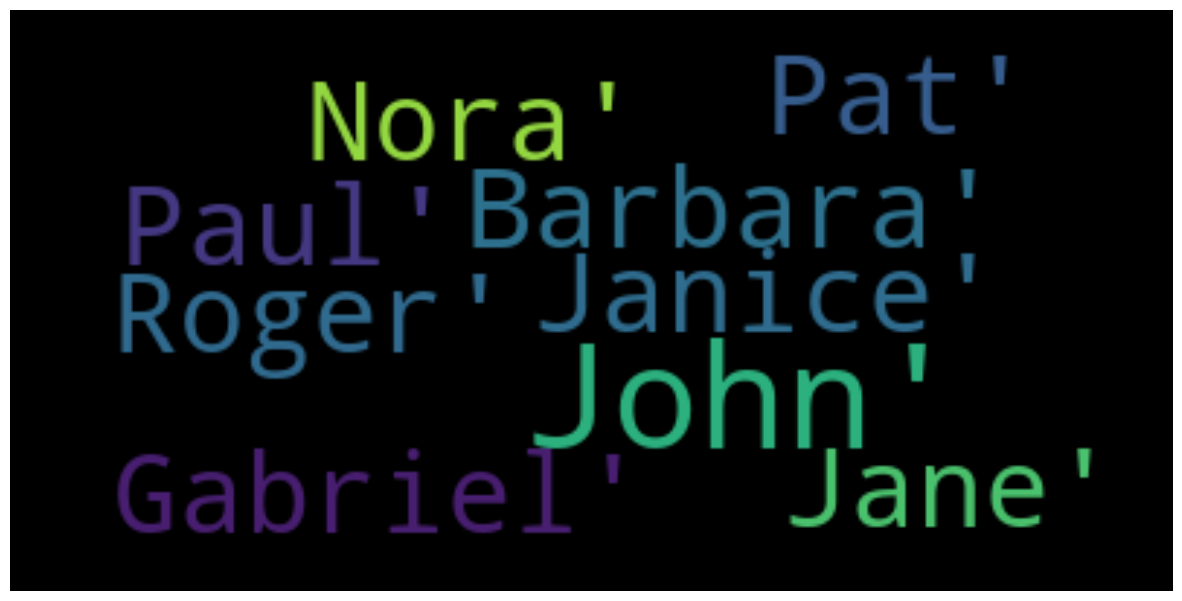

In [7]:
#Q36. Create a Word Cloud with First name of Student Names based on thier Race 

df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Demography')

# Unify text from First Name column
text = df['First Name'].values 

# size of word cloud
plt.rcParams["figure.figsize"] = (15,10)

wordcloud = WordCloud(max_font_size = 50).generate(str(text))

#plot word cloud

plt.plot()

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [31]:
#Q37 Display the student Names and respective grades who has Maximum heart rate
df_exam = pd.read_excel("De_Gr_HR_Combined.xlsx")

Max_Heart_Rate = (df_exam.groupby(['Student_id', 'First Name', 'Last Name', 'Midterm 1', 'Midterm 2', 'final'])['HR']).max()

print(Max_Heart_Rate, "Max_Heart_Rate")


Student_id  First Name  Last Name  Midterm 1  Midterm 2  final
S01         Barbara     Walters    78         82         182      190.713
S02         Nora        Jones      82         85         180      196.847
S03         Gabriel     Willows    77         90         188      194.839
S04         John        Doe        75         77         149      199.278
S05         Jane        Doe        67         77         157      198.272
S06         Pat         Murray     71         64         175      199.156
S07         Roger       Frederick  64         33         110      186.544
S08         John        Wills      92         88         184      192.261
S09         Paul        Cartney    80         39         126      197.741
S10         Janice      Smith      89         64         116      182.027
Name: HR, dtype: float64 Max_Heart_Rate


In [32]:
#Q38 Write a Python program to get the number of occurrences of a specified element in the array.


n = int(input("Enter your number ="))

from array import *
arr = array('i', [1, 6, 4, 4, 1, 0, 4, 6, 1, 4, 3, 44, 4])

print("Original array: "+ str(arr))
print("Number of occurences of the number", n ,"in said array: "+str(arr.count(n)))

Enter your number =4
Original array: array('i', [1, 6, 4, 4, 1, 0, 4, 6, 1, 4, 3, 44, 4])
Number of occurences of the number 4 in said array: 5


In [38]:
#Q.39 Create a 3D list using nested for loops.

x = int(input("Enter your dim (x) to create 3Dlist ="))
y = int(input("Enter your dim (y) to create 3Dlist ="))
z = int(input("Enter your dim (z) to create 3Dlist="))

a = input("Enter your number/list to create 3Dlist =")


def create_3d_list(x, y, z):
    Arr = []
    for i in range(x):
        Arr_2d = []
        for j in range(y):
            Arr_1d = []
            for k in range(z):
                Arr_1d.append(a)
            Arr_2d.append(Arr_1d)
        Arr.append(Arr_2d)
    return Arr
 
ThreeD_arr = create_3d_list(x, y, z)

ThreeD_arr

Enter your dim (x) to create 3Dlist =3
Enter your dim (y) to create 3Dlist =3
Enter your dim (z) to create 3Dlist=3
Enter your number/list to create 3Dlist =[5,[2,7],9]


[[['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]'],
  ['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]'],
  ['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]']],
 [['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]'],
  ['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]'],
  ['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]']],
 [['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]'],
  ['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]'],
  ['[5,[2,7],9]', '[5,[2,7],9]', '[5,[2,7],9]']]]

In [10]:
#Q.40 #Display each row of this array as a separate slice

Array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

print(Array[0])
print(Array[1])
print(Array[2])

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


In [14]:
#Q. 41 Find the Student name and the Exam who has the Temprature '36.042'

df1= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Demography')
df2= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Temp')

Values1 = df1[['Student_id','DOB','First Name','Last Name', 'Gender', 'Race']]
Values2 = df2[['TEMP', 'Time in mins', 'Student_id', 'Exam']]

df_Demo_Temp_Combined = pd.merge(df1, df2, on='Student_id', how='outer')

#df_Demo_Temp_Combined.to_excel("Temp & Demography_Combined.xlsx")

df_Demo_Temp_Combined.query("TEMP == 36.042 & Exam == 'final'")

df1 = df_Demo_Temp_Combined.query("TEMP == 36.042 & Exam == 'final'")
df1

,Student_id,DOB,First Name,Last Name,Gender,Race,TEMP,Time in mins,Exam
921,S02,2009-02-02,Nora,Jones,F,White,36.042,162.0,final


# Q42 - 

In [25]:
#Q.42 Using arrays and loops, find the count of students based on gender.

df3 = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Demography')
array1 = df3[['Student_id', 'First Name', 'Last Name','Gender']].to_numpy()
#length = len(array1)
#length
#df3

array1

array([['S01', 'Barbara', 'Walters', 'F'],
       ['S02', 'Nora', 'Jones', 'F'],
       ['S03', 'Gabriel', 'Willows', 'F'],
       ['S04', 'John', 'Doe', 'M'],
       ['S05', 'Jane', 'Doe', 'F'],
       ['S06', 'Pat', 'Murray', 'M'],
       ['S07', 'Roger', 'Frederick', 'M'],
       ['S08', 'John', 'Wills', 'M'],
       ['S09', 'Paul', 'Cartney', 'M'],
       ['S10', 'Janice', 'Smith', 'F']], dtype=object)

In [26]:
from array1 import *
if Gender in len[array1] == 'F':
    print(list(array1['gender']).count('F'))
elif Gender in len[array1] == 'M':
    print(list(array1['gender']).count('F'))
else:
    print('Other')

ModuleNotFoundError: No module named 'array1'

In [24]:
count_of_students = df3[["Gender"]].value_counts()
count_of_students

Gender
F         5
M         5
Name: count, dtype: int64

# Q43-

In [ ]:
#Q.43 Generate Unique Student ID  using Lamda Function.
df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'EDA')

Student_ID = int(input("Enter your student_id no: "))

Unique_Student_ID = df['Student_id'].apply(lambda x: df['Student_id'].nunique())

if (Student_ID == Unique_Student_ID):
    print(Student_ID + "is a Unique Student Id")
else:
    print(Student_ID + "is not a Unique Student Id")


In [11]:
#Q.44 Create a Box  plot for HR and Temp

df1= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'HR')
df2= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Temp')


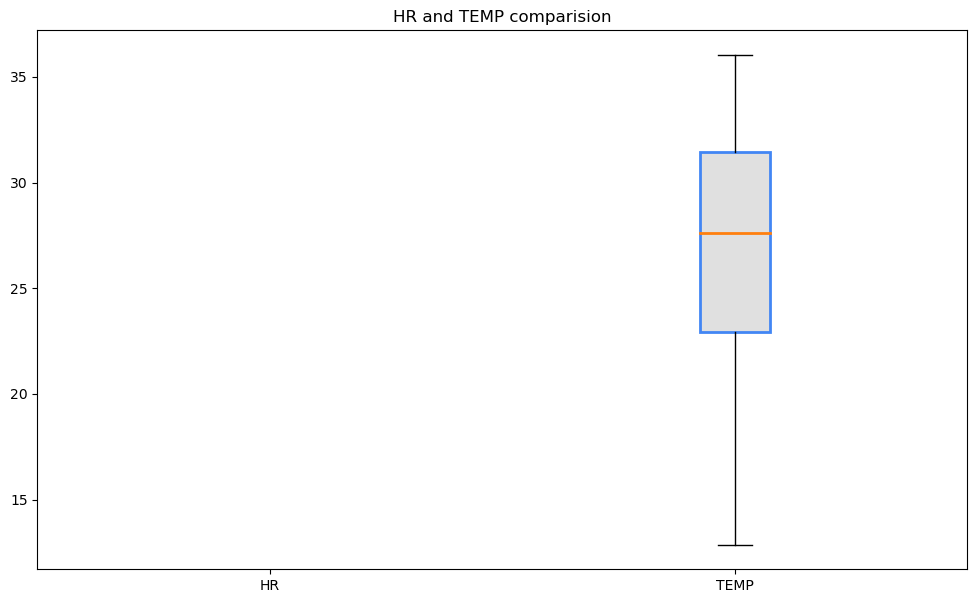

In [12]:
plt.style.use('default')

plt.figure(figsize = (12,7))

labels = ['HR', 'TEMP']

boxes = plt.boxplot([df1.HR, df2.TEMP], labels = labels, patch_artist=True, medianprops ={'linewidth':2})

#set edge color
for box in boxes['boxes']:
    box.set(color='#4286f4', linewidth =2)
    
#Change fill color   

box.set(facecolor='#e0e0e0')

plt.title('HR and TEMP comparision')
    
plt.show()

In [20]:
# Q.45 Find the student's Max mean EDA who are attending Final 
df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'EDA')
table = pd.pivot_table(df,  index=['Student_id'], columns=['Exam'], values=['EDA','Time in mins'],
           aggfunc={'EDA':[np.mean], 'Time in mins':[np.mean]},fill_value=0)
table

EDA                     Time in mins                    
                mean                             mean                    
Exam           final midterm 1 midterm 2        final midterm 1 midterm 2
Student_id                                                               
S01         0.103118  0.326500  0.117016        195.0      93.5      93.0
S010        0.111297  0.202371  0.169449        192.5      97.5     108.5
S02         0.078360  0.165211  0.125896        211.5     100.0     116.0
S03         0.169737  0.237365  0.574535        215.5     102.0      85.5
S04         0.526800  0.341572  0.497309        133.0      97.5     112.0
S05         0.542409  0.147425  0.376175        127.5     100.5     100.5
S06         0.129932  0.595308  0.205763        199.5      93.0     118.5
S07         0.212474  0.152325  0.263722        164.0     103.5      90.5
S08         0.534721  0.422212  0.108777        149.5      90.0      83.5
S09         0.402572  0.166735  0.317053        118.5     106.0     104.0

In [15]:
#Q.46 Find the Grade of a Student whose Name ends with 'S'

df1= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Demography')
df2= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Grades')

Values1 = df1[['Student_id','DOB','First Name','Last Name', 'Gender', 'Race']]
Values2 = df2[['Student_id', 'Midterm 1','Midterm 2', 'final']]

df_Gr_Demo_combined = pd.merge(df1, df2, on='Student_id', how='outer')

#df.to_excel("Grades & Demography_Combined.xlsx")

df_s= df_Gr_Demo_combined[df_Gr_Demo_combined['Last Name'].astype(str).str.endswith('s', na=False)]

df_s

,Student_id,DOB,First Name,Last Name,Gender,Race,Midterm 1,Midterm 2,final
0,S01,2009-01-01,Barbara,Walters,F,White,78,82,182
1,S02,2009-02-02,Nora,Jones,F,White,82,85,180
2,S03,2009-07-12,Gabriel,Willows,F,Asian,77,90,188
7,S08,2009-03-03,John,Wills,M,White,92,88,184


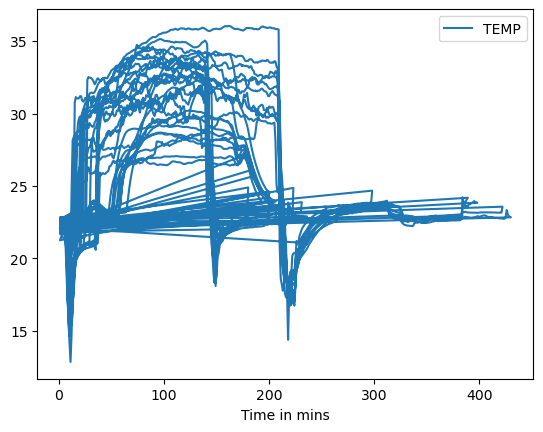

In [16]:
#Q.47 Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)

df2 = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Temp')

df2.plot.line(x='Time in mins', y= 'TEMP')

plt.show()

<Axes: xlabel='Time in mins', ylabel='TEMP'>

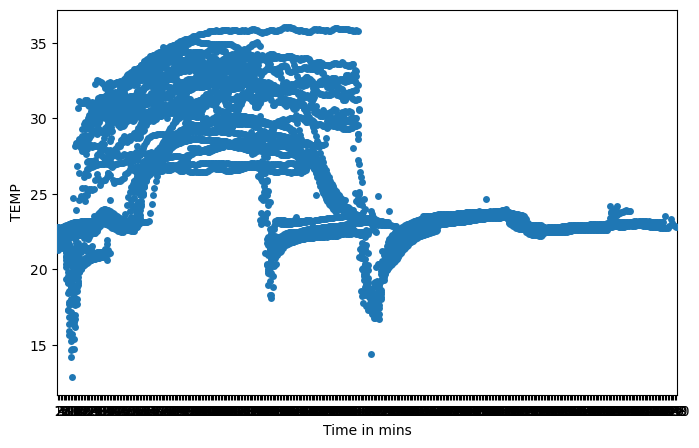

In [17]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Time in mins',y='TEMP',data=df2,jitter=True,dodge=True)

In [21]:
#Q48 Find the Full Name of the student who has Max HR

df1= pd.read_excel("De_Gr_HR_Combined.xlsx")

T1 = df1[df1['HR']==df1['HR'].max()]
T1


,Unnamed: 0.1,Unnamed: 0,Student_id,Midterm 1,Midterm 2,final,DOB,First Name,Last Name,Gender,Race,HR,Time in mins,Exam
2720,2720,3,S04,75,77,149,2009-09-09,John,Doe,M,Asian,199.278,41,Midterm 1


In [12]:
#49.[    "Python Hackthaon.",
#    "December 2023.",
#   "Numpy Ninja."  ]
#tokenise the Sentences  and place it in single column

sentences = [
    "Python Hackthaon.",
    "December 2023.",
    "Numpy Ninja."
]
String = []
for i in sentences:
    String.extend(i.split())
df = pd.DataFrame(data={'Column':String})
print(df)

       Column
0      Python
1  Hackthaon.
2    December
3       2023.
4       Numpy
5      Ninja.


In [11]:
#50.Count the Students who are in the Race Group 'White'

df=pd.read_excel("Exam Stress Final.xlsx","Demography")
white = df[df['Race'] == 'White']
x = white['Race'].count()
print("Number of Students who are in Race Group:", x)

Number of Students who are in Race Group: 4


In [3]:
#51.Display the Youngest Student demographic details. with Avg Heart Rate.

df1=pd.read_excel("Exam Stress Final.xlsx","Demography")
df2=pd.read_excel("Exam Stress Final.xlsx","HR")
df1["Age"] = (pd.to_datetime("today") - df1["DOB"]).dt.days // 365
youngest_studentid = df1["Age"].idxmin()
youngest_student_info= df1.loc[youngest_studentid]
filtered_hr_data = df2[df2["Student_id"] == youngest_student_info["Student_id"]]
specific_student_hr_mean = filtered_hr_data["HR"].mean()
print("Youngest Student Information with Average heart rate")
print(f"Student_id        : {youngest_student_info['Student_id']}")
print(f"Name              : {youngest_student_info['First Name']} {youngest_student_info['Last Name']}")
print(f"Gender            : {youngest_student_info['Gender']}")
print(f"Race              : {youngest_student_info['Race']}")
print(f"Average Heart Rate: {specific_student_hr_mean:.2f}")

Youngest Student Information with Average heart rate
Student_id        : S07
Name              : Roger Frederick
Gender            : M
Race              : African
Average Heart Rate: 103.84


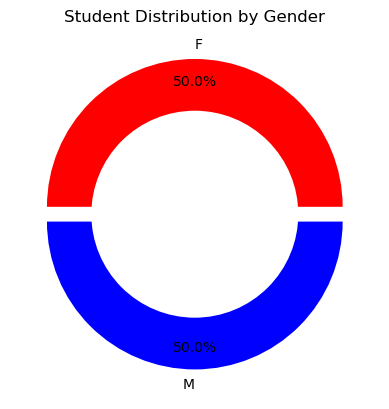

In [9]:
#52.Plot the Donut chart Student distrubution by Gender.

df=pd.read_excel("Exam Stress Final.xlsx","Demography")
gender_counts = df['Gender'].value_counts()

# Set pie chart slices and labels
pie_slices = gender_counts.values
pie_labels = gender_counts.index
colors = ['#FF0000', '#0000FF']
explode = (0.05,0.05)

# Create pie chart
plt.pie(pie_slices, labels=pie_labels,colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode= explode)

# Add title
plt.title('Student Distribution by Gender')

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Add Legends
#plt.legend(labels, loc="upper right")
 
# Display chart
plt.show()

In [8]:
#53.Calculate the 'AGE' of the Student and Display with Student Name 

from datetime import date
df=pd.read_excel("Exam Stress Final.xlsx","Demography")

df["Age"] = (pd.to_datetime('today') - df["DOB"]).dt.days // 365

print("Student Name | Age")

for i, row in df.iterrows():
    print(f"{row['First Name']} {row['Last Name']} | {row['Age']}")

Student Name | Age
Barbara Walters | 14
Nora Jones | 14
Gabriel Willows | 14
John Doe | 14
Jane Doe | 14
Pat Murray | 15
Roger Frederick | 13
John Wills | 14
Paul Cartney | 14
Janice Smith | 14


In [7]:
#54. np.arange(1,31).reshape(6,5),find array slicing to get the elements 4,5,24,25,29,30.

arr=np.arange(1,31).reshape(6,5)
print(arr)
result_arr=np.concatenate((arr[0:1:,3:], arr[-2:6:,3:]),axis=0)
print('Array slicing: \n', result_arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Array slicing: 
 [[ 4  5]
 [24 25]
 [29 30]]


In [4]:
#55.Display the mean Heart Rate who scored Least Grade in Final

df1=pd.read_excel("Exam Stress Final.xlsx","Grades")
df2=pd.read_excel("Exam Stress Final.xlsx","HR")
least_score = df1["final"].idxmin()
least_grade_details= df1.loc[least_score]
filtered_hr_data = df2[df2["Student_id"] == youngest_student_info["Student_id"]]
specific_student_hr_mean = filtered_hr_data["HR"].mean()
print(f"Mean Heart Rate who Scored Least Grade in Final: {specific_student_hr_mean:.2f}")   

Mean Heart Rate who Scored Least Grade in Final: 103.84


In [5]:
#56.Input the Lastname of the Student and Based on the gender concatinate 'MR' or 'MS' to the Full Name
df=pd.read_excel("Exam Stress Final.xlsx","Demography")
InputLastname =input('Enter the last name:').lower()
df["Full Name"]=df.apply(lambda row: 'MR' if row['Gender'] == 'M' else 'MS', axis=1)+'.'+ df['First Name'] + ' ' + df['Last Name']
df["Last Name"] = df["Last Name"].str.lower()
Printname = df[df["Last Name"] == InputLastname]
#print(Printname["Full Name"].values[0])
if len(Printname) > 0:
    for name in Printname["Full Name"]:
        print(name)
else:
    print(f"The given last name is not available: {InputLastname}")

Enter the last name:Walters
MS.Barbara Walters


Text(0.5694444444444446, 0.5, 'Count of the Students')

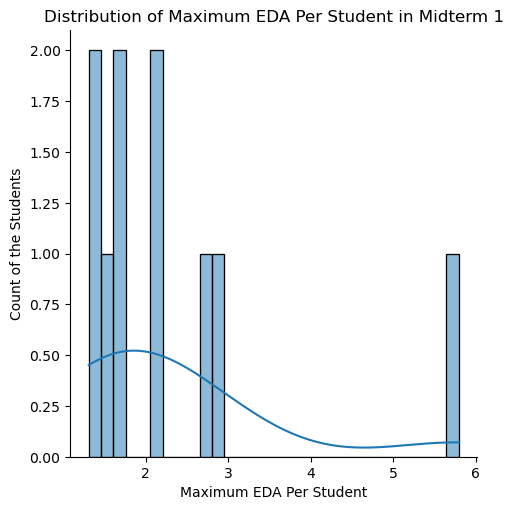

In [6]:
#57.Give Distrubution chart of MAX EDA of the midterm1.

df=pd.read_excel("Exam Stress Final.xlsx","EDA")
midterm1 = df[df['Exam'] == 'midterm 1']
max_eda_per_student = (df.groupby('Student_id')['EDA']).max()
sns.displot(max_eda_per_student, kde=True,bins=30)
plt.title("Distribution of Maximum EDA Per Student in Midterm 1")
plt.xlabel("Maximum EDA Per Student")
plt.ylabel("Count of the Students")

Text(0.5, 1.0, 'Students count based on Genderwise')

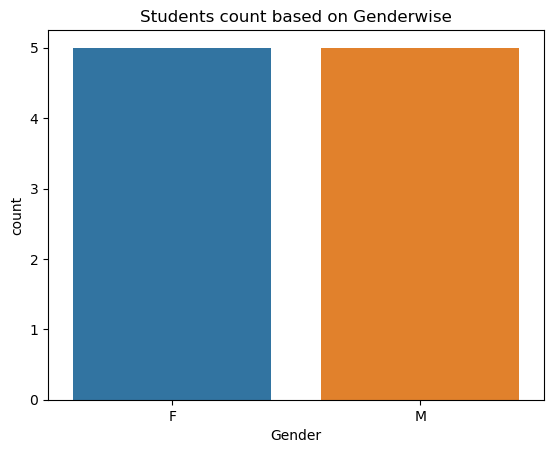

In [5]:
#58.Count the students based on Genderwise using count plot.

df=pd.read_excel("Exam Stress Final.xlsx","Demography")
sns.countplot(data=df,x='Gender')
plt.title("Students count based on Genderwise")

In [7]:
#59.Display full name of Student who are born in year '2010'

df=pd.read_excel("Exam Stress Final.xlsx","Demography")
ListofStudentsin2010 = []
for index, row in df.iterrows():
    if pd.to_datetime(row["DOB"]).year == 2010:
        full_name = f"{row['First Name']} {row['Last Name']}"
        ListofStudentsin2010.append(full_name)
print("Full Name of Student Who are born in year 2010:", ListofStudentsin2010)

Full Name of Student Who are born in year 2010: ['Roger Frederick']


In [3]:
#60.   [ 1,  2,  3,  4,  5],
#      [ 6,  7,  8,  9, 10],
#      [11, 12, 13, 14, 15],
#      [16, 17, 18, 19, 20],
#      [21, 22, 23, 24, 25],
#      [26, 27, 28, 29, 30]  In the Array,find array slicing for elements 2,8,14,20.

arr=np.arange(1,31).reshape(6,5)
result = arr[[0,1, 2, 3], [1, 2, 3, 4]]
print('Array slicing: \n')
for i in result.flat:
    print(i)

Array slicing: 

2
8
14
20


In [ ]:
#61.Create a dataframe with Max EDA and Mean HR as the indices and the count of number of records per student as the value.

In [ ]:
#62.Print the Last name like below ouptput eg:.Last Name and count of Last Name   Occurance  :
#Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})

df = pd.read_excel("Exam Stress Final.xlsx","Demography")
Counter = df['Last Name'].value_counts()
print(Counter)

In [ ]:
#63.Retrieve the row with minimum EDA using sorting technique.

df = pd.read_excel("Exam Stress Final.xlsx","EDA")
sorted_df = df.sort_values(by='EDA')
min_eda_row = sorted_df.iloc[0]
print(min_eda_row)

In [ ]:
#64.get the last letter of last name of students using RegEX

import re
def get_last_letter_of_last_name(name):
    pattern = re.compile(r"\S$")
    match = re.search(pattern, name)
    if match:
          return match.group(0)
    else:
          return None
df=pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Demography')
df1=df["Last Name"]
last_letters = []
for Lastname in df["Last Name"]:
    last_letter = get_last_letter_of_last_name(Lastname)
    if last_letter:
        last_letters.append(last_letter)
print(f"Last letters of last names: {last_letters}")

In [3]:
#Q.65 Generate a 3x3  Array using Random values between 1to 9  and Fix the values and position  in Next Run.

arr = np.array([[1,2,3],[7,8,9],[4,5,6]])
print(arr)
my_iter = iter (arr)
print("First Row:",next(my_iter))
print("Second Row:",next(my_iter))
print("Third Row:",next(my_iter))

[[1 2 3]
 [7 8 9]
 [4 5 6]]
First Row: [1 2 3]
Second Row: [7 8 9]
Third Row: [4 5 6]


In [4]:
#Q.66 find the way to reverse string for given input 

str1 = str(input("Enter a Sentence"))
s = str1.split()[::-1]
r= []
for i in s:
    r.append(i)
print(" ".join(r))

Enter a SentenceI Love to Learn Python
Python Learn to Love I


In [4]:
#Q.67 from'Python Hackthon Dec 2023' give 'Python Hack' using RegEX

import re
str = "Python Hackthon Dec 2023"
print(re.split("thon Dec 2023", str, flags = re.IGNORECASE))

['Python Hack', '']


In [7]:
#Q.69 Input any string from user, Convert that into a tuple and then find the lenghth of that tuple

str2 = input("Enter a sentence ")
t = tuple(str2)
#print(t)
length = len (t)
print(length)

Enter a sentence I Love to Learn Python
22


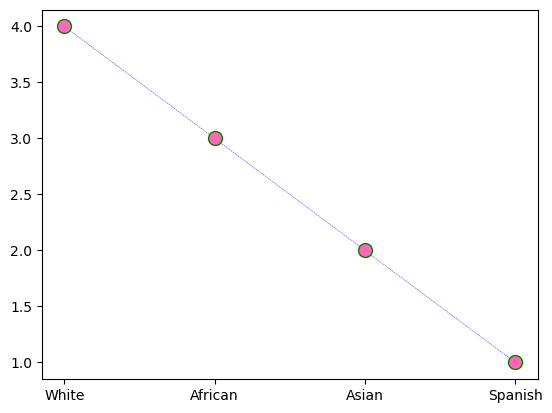

In [13]:
#Q.71 Creat the visualisation to count the student based on race

df1 = pd.read_excel("Exam Stress Final.xlsx","Demography")
df1[["Student_id","Race"]]
count_of_students = df1['Race'].value_counts()
#print(count_of_students)
plt.plot(count_of_students, ls = '--', color = 'b', linewidth = '0.3', marker = 'o', ms = 10, mec = 'g', mfc = 'hotpink')
plt.show()

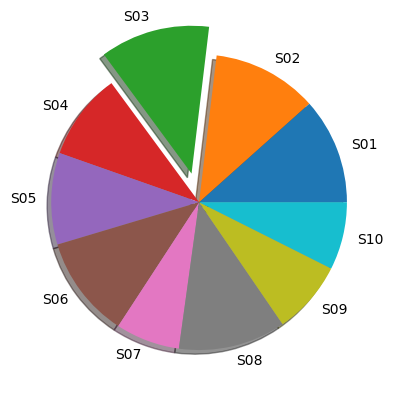

In [14]:
#Q.74 Create a Pie chart for  Grades and explode the wedge with Highest Grade in Final and Label with the Student ID

Grades_df = pd.read_excel("Exam Stress Final.xlsx","Grades")
Grades_df
Final_Grades = Grades_df["final"]
Final_Grades
Student = Grades_df["Student_id"]
#print(Student)
my_labels = Student
my_explode = [0,0,0.2,0,0,0,0,0,0,0]
plt.pie(Final_Grades, labels=my_labels, explode = my_explode, shadow = 'True')
#plt.legend(title = "Analysis of Students with Grades in Final Exam")
plt.show()

<Axes: xlabel='IBI', ylabel='Density'>

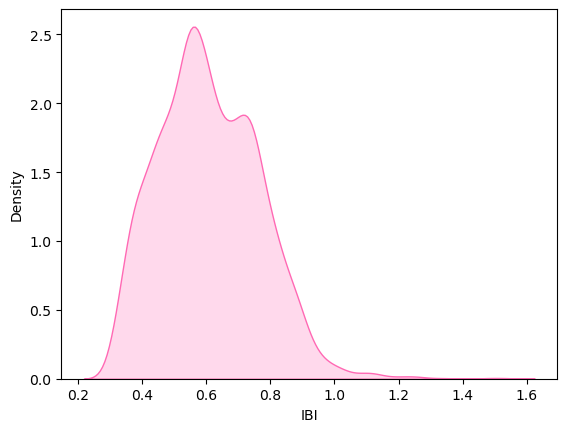

In [7]:
#Q.77 Plot the Density Chart for IBI 

df = pd.read_excel("Exam Stress Final.xlsx", "IBI")
sns.kdeplot(df["IBI"], fill = True, color = 'HotPink')

